In [1]:
import sys
from dotenv import load_dotenv, dotenv_values
load_dotenv("../cv19.env")
sys.path.append(dotenv_values("../cv19.env")["CV19ROOT"])

In [2]:
import pandas as pd

In [3]:
from cv19.simulation import Simulation

In [4]:
# Initialize the simulation object
config_file = "../config_files/main.toml"
sim = Simulation(config_file, verbose=False)

In [5]:
# Run the simulation
sim.run()

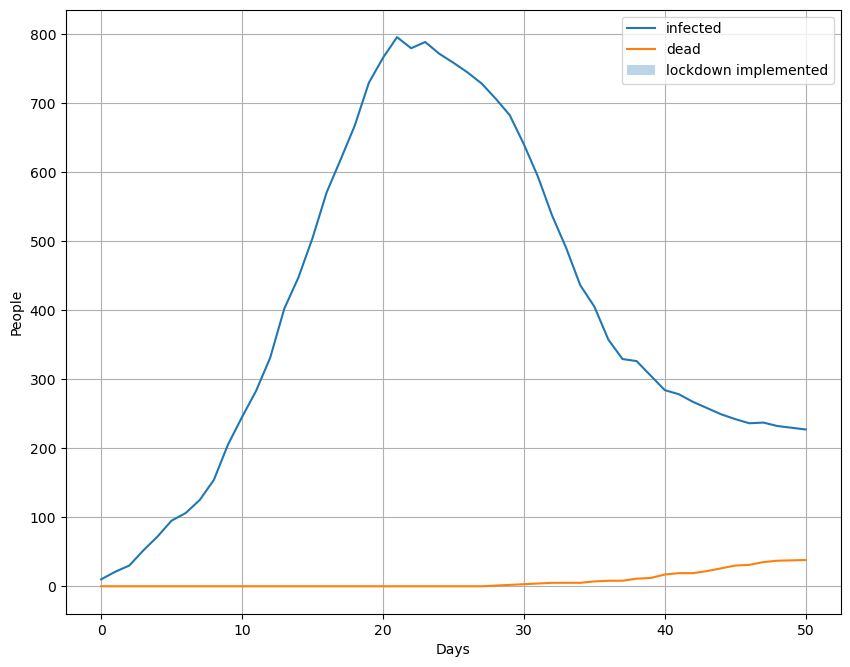

In [6]:
# Plot the results
import matplotlib.pyplot as plt
sim.plot(infected=True, recovered=False, dead=True, susceptible=False, log=False, lockdown=True)

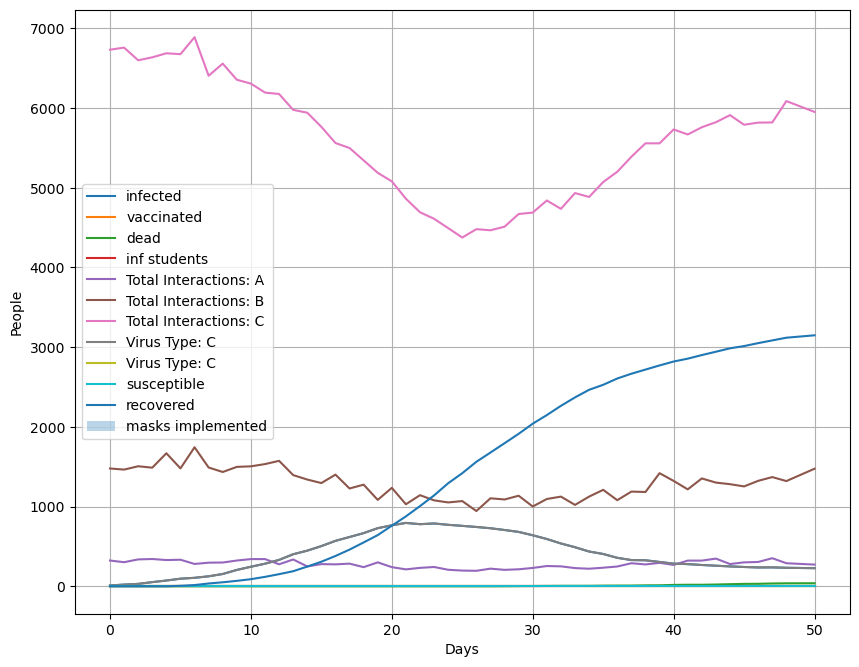

In [7]:
sim.plot(infected=True, vaccinated=True, masks=True, dead=True, inf_students=True,
         n_interactions={'A': True, 'B': True, 'C': True}, virus_types={"general": True, "alpha": True})

In [8]:
# Example of how to access the raw data
raw_df = sim.get_tracking_dataframe()
raw_dict = sim.get_tracking_arrays()

raw_df.head()

,new_infected,delta_infected,infected,susceptible,recovered,dead,hospitalized,ICU,quarantined,new_quarantined,...,delta,n_interactions_HOUSE_GENERAL,n_interactions_HOUSE_STUDENT,n_interactions_A,n_interactions_B,n_interactions_C,n_interactions_LECT,n_interactions_STUDY,n_interactions_FOOD,n_interactions_RES
day,,,,,,,,,,,,,,,,,,,,,
0,0,0,10,0,0,0,0,0,0,0,...,0,7415.0,1912.0,323.0,1478.0,6733.0,0.0,0.0,0.0,0.0
1,11,11,21,0,0,0,1,0,2,0,...,0,7415.0,1912.0,302.0,1464.0,6759.0,0.0,0.0,0.0,0.0
2,9,9,30,0,0,0,1,0,2,0,...,0,7415.0,1912.0,337.0,1506.0,6600.0,0.0,0.0,0.0,0.0
3,22,22,52,0,0,0,2,0,25,6,...,0,7415.0,1912.0,342.0,1488.0,6637.0,0.0,0.0,0.0,0.0
4,20,20,72,0,0,0,3,0,51,4,...,0,7415.0,1912.0,329.0,1669.0,6688.0,0.0,0.0,0.0,0.0
